In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stroke=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
stroke.shape

(5110, 12)

In [5]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
stroke.describe(include=['object'])

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [7]:
data_cat= [col for col in stroke.columns.values if stroke[col].dtype=='object']

In [8]:
data_cat

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [9]:
categorical_values=stroke[data_cat]

In [10]:
categorical_values

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


In [11]:
numerical_variables=stroke.drop(categorical_values,axis=1)

In [12]:
numerical_variables

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.6,1
1,51676,61.0,0,0,202.21,NaN,1
2,31112,80.0,0,1,105.92,32.5,1
3,60182,49.0,0,0,171.23,34.4,1
4,1665,79.0,1,0,174.12,24.0,1
...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,NaN,0
5106,44873,81.0,0,0,125.20,40.0,0
5107,19723,35.0,0,0,82.99,30.6,0
5108,37544,51.0,0,0,166.29,25.6,0


Missing Values in Numerical variables

In [13]:
total=numerical_variables.isnull().sum().sort_values(ascending=True)
percentage=(numerical_variables.isnull().sum())/(numerical_variables.isnull().count()).sort_values(ascending=True)
missing_values_num=pd.concat([total,percentage],axis=1,keys=['total','percenatge'])
missing_values_num

,total,percenatge
id,0,0.000000
age,0,0.000000
hypertension,0,0.000000
heart_disease,0,0.000000
avg_glucose_level,0,0.000000
stroke,0,0.000000
bmi,201,0.039335


In [14]:
for col in numerical_variables.columns.values:
    missing_values=stroke[col].isnull().sum()
    
if missing_values>50:
        numerical_variables=numerical_variables.drop(col,axis=1)
else:
        numerical_variables=numerical_variables.fillna(numerical_variables[col].median())


In [15]:
from scipy.stats import skew
numerical_variables_skew=numerical_variables.apply(lambda x:skew(x.dropna()))

In [16]:
numerical_variables_skew=numerical_variables_skew[numerical_variables_skew>1]

In [17]:
numerical_variables_skew

hypertension         2.714595
heart_disease        3.946085
avg_glucose_level    1.571822
stroke               4.192053
dtype: float64

In [18]:
numerical_variables_skew.index

Index(['hypertension', 'heart_disease', 'avg_glucose_level', 'stroke'], dtype='object')

In [19]:
numerical_variables[numerical_variables_skew.index]=np.log1p(numerical_variables[numerical_variables_skew.index])

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hypertension'}>],
       [<AxesSubplot:title={'center':'heart_disease'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'stroke'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

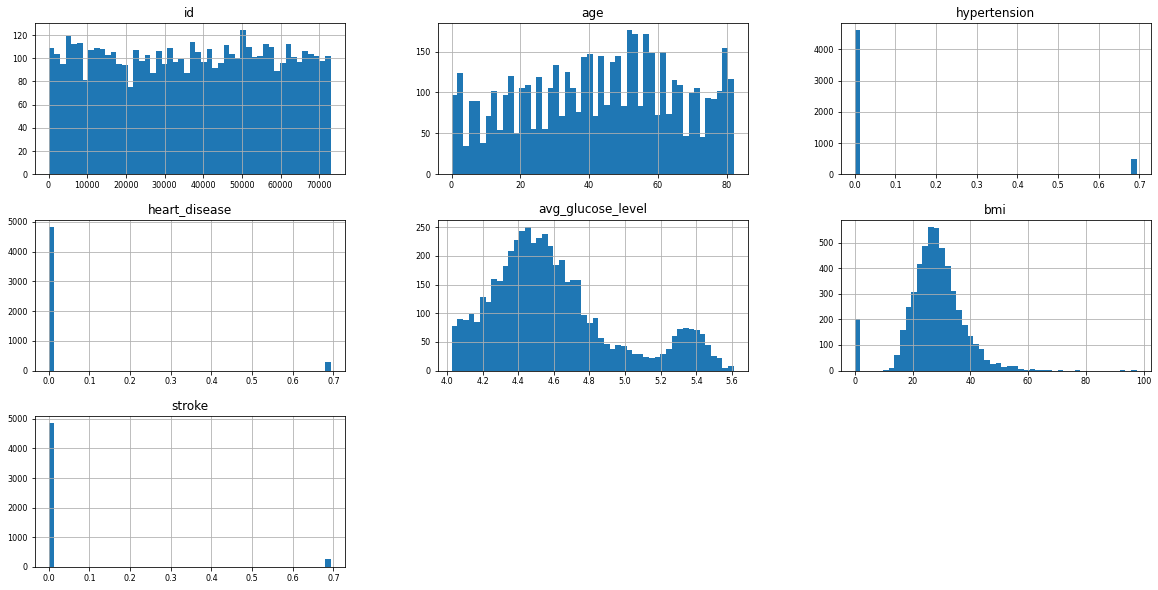

In [20]:
numerical_variables.hist(figsize=(20,10),bins=50,xlabelsize=8,ylabelsize=8)

In [21]:
numerical_variables=(numerical_variables-numerical_variables.min())/(numerical_variables.max()-numerical_variables.min())

In [22]:
numerical_variables.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.500197,0.526692,0.097456,0.054012,0.364100,0.284393,0.048728
std,0.290392,0.276033,0.296607,0.226063,0.226889,0.097638,0.215320
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.242535,0.304199,0.000000,0.000000,0.210213,0.234631,0.000000
50%,0.505880,0.548340,0.000000,0.000000,0.318698,0.283811,0.000000
75%,0.749455,0.743652,0.000000,0.000000,0.454276,0.336066,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Categorical variables missing values treatment

In [23]:
total=categorical_values.isnull().sum().sort_values(ascending=True)
percentage=(categorical_values.isnull().sum())/(categorical_values.isnull().count()).sort_values(ascending=True)
missing_values_cat=pd.concat([total,percentage],axis=1,keys=['total','percenatge'])
missing_values_cat

,total,percenatge
gender,0,0.0
ever_married,0,0.0
work_type,0,0.0
Residence_type,0,0.0
smoking_status,0,0.0


THERE ARE NO MISSING VALUES IN THE CATEGORICAL VARIABLES

In [24]:
for col in categorical_values.columns.values:
    missing_values=categorical_values[col].isnull().sum()
    
if missing_values>50:
        categorical_values=categorical_values.drop(col,axis=1)
else:
        categorical_values=categorical_values.fillna('XXX')


DUMMY CODING FOR CATEGORICAL VARIABLES

In [25]:
categorical_values_dummies=pd.get_dummies(categorical_values)

In [26]:
categorical_values.shape

(5110, 5)

In [27]:
categorical_values_dummies.shape

(5110, 16)

In [28]:
numerical_variables.shape

(5110, 7)

In [29]:
new_data=pd.concat([numerical_variables,categorical_values_dummies],axis=1)

In [30]:
new_data.shape

(5110, 23)

In [31]:
new_data

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.123214,0.816895,0.0,1.0,0.891344,0.375000,1.0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,0.708205,0.743652,0.0,0.0,0.813868,0.000000,1.0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,0.426015,0.975586,0.0,1.0,0.407703,0.332992,1.0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,0.824928,0.597168,0.0,0.0,0.709247,0.352459,1.0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,0.021929,0.963379,1.0,0.0,0.719772,0.245902,1.0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0.249297,0.975586,1.0,0.0,0.260725,0.000000,0.0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
5106,0.614850,0.987793,0.0,0.0,0.512563,0.409836,0.0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
5107,0.269730,0.426270,0.0,0.0,0.255028,0.313525,0.0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
5108,0.514278,0.621582,0.0,0.0,0.690840,0.262295,0.0,0,1,0,...,0,1,0,0,1,0,0,1,0,0


CREATION OF DATASETS

In [32]:
x=new_data
y=x.pop(item='stroke')

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=123)

In [34]:
print('y_train',y_train.shape)
print('y_test',y_test.shape)
print('x_train',x_train.shape)
print('x_test',x_test.shape)

y_train (3577,)
y_test (1533,)
x_train (3577, 22)
x_test (1533, 22)


In [35]:
y_train

2909    0.0
1237    0.0
2335    0.0
2750    0.0
607     0.0
       ... 
1593    0.0
4060    0.0
1346    0.0
3454    0.0
3582    0.0
Name: stroke, Length: 3577, dtype: float64

Building Logistic Regression Base Model

In [36]:
import statsmodels.api as sm
#model Building
logit=sm.Logit(y_train,x_train)
#fitting the model
model1=logit.fit()
#Summary
model1.summary()

         Current function value: 0.153413
         Iterations: 35


C:\Users\anagha141\3DObjects\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 3577
Model:                          Logit   Df Residuals:                     3559
Method:                           MLE   Df Model:                           17
Date:                Sat, 17 Apr 2021   Pseudo R-squ.:                  0.2340
Time:                        14:27:58   Log-Likelihood:                -548.76
converged:                      False   LL-Null:                       -716.41
Covariance Type:            nonrobust   LLR p-value:                 5.586e-61
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
id                                 0.3502      0.280      1.253      0.210      -0.198       0.898
age                                6.2842      0.554     11.338      0.000       5.198       7.371
hypertension                       0.2936      0.206      1.422      0.155      -0.111       0.698
heart_disease                      0.2747      0.223      1.232      0.218      -0.162       0.712
avg_glucose_level                  1.0678      0.299      3.574      0.000       0.482       1.653
bmi                               -3.4015      0.777     -4.380      0.000      -4.924      -1.879
gender_Female                      2.2852        nan        nan        nan         nan         nan
gender_Male                        2.1668        nan        nan        nan         nan         nan
gender_Other                     -12.7992        nan        nan        nan         nan         nan
ever_married_No                   -4.0646   7.59e+06  -5.36e-07      1.000   -1.49e+07    1.49e+07
ever_married_Yes                  -4.2818   8.78e+06  -4.88e-07      1.000   -1.72e+07    1.72e+07
work_type_Govt_job                 1.0886   4.72e+06   2.31e-07      1.000   -9.25e+06    9.25e+06
work_type_Never_worked           -13.1738   4.85e+06  -2.71e-06      1.000   -9.51e+06    9.51e+06
work_type_Private                  1.3599   4.85e+06   2.81e-07      1.000    -9.5e+06     9.5e+06
work_type_Self-employed            0.8167   4.86e+06   1.68e-07      1.000   -9.52e+06    9.52e+06
work_type_children                 1.5618   4.94e+06   3.16e-07      1.000   -9.69e+06    9.69e+06
Residence_type_Rural              -4.2100   9.68e+06  -4.35e-07      1.000    -1.9e+07     1.9e+07
Residence_type_Urban              -4.1367   1.08e+07  -3.84e-07      1.000   -2.11e+07    2.11e+07
smoking_status_Unknown            -2.1166   3.83e+06  -5.52e-07      1.000   -7.51e+06    7.51e+06
smoking_status_formerly smoked    -2.1206   3.83e+06  -5.53e-07      1.000   -7.51e+06    7.51e+06
smoking_status_never smoked       -2.1625   3.83e+06  -5.64e-07      1.000   -7.51e+06    7.51e+06
smoking_status_smokes             -1.9470   3.83e+06  -5.08e-07      1.000   -7.51e+06    7.51e+06
==================================================================================================
"""

In [37]:
y_predict=model1.predict(x_test)

In [38]:
predicted_df=pd.DataFrame(y_predict)

In [39]:
predicted_df['stroke']=np.where(predicted_df[0]>= 0.50,1,0)

In [40]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predicted_df['stroke']))

0.954337899543379


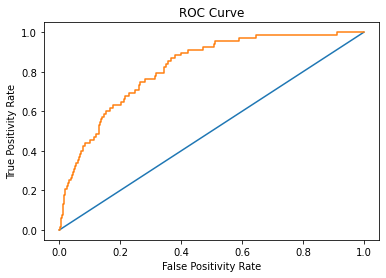

In [41]:
y_pred=model1.predict(x_test)
from sklearn.metrics import roc_curve
tpr,fpr,thresholds=roc_curve(y_test,y_pred)
plt.plot([0,1],[0,1])
plt.plot(tpr,fpr)
plt.xlabel('False Positivity Rate')
plt.ylabel('True Positivity Rate')
plt.title("ROC Curve")
plt.show()

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted_df['stroke']))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1465
         1.0       0.25      0.01      0.03        68

    accuracy                           0.95      1533
   macro avg       0.60      0.51      0.50      1533
weighted avg       0.92      0.95      0.93      1533



In [43]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,predicted_df['stroke'])

0.5063290503914877

In [44]:
cols = ['Model','R-Squared Value','ROC Score', 'Precision Score', 'Recall Score','Accuracy Score',
        'Kappa Score']
models_report = pd.DataFrame(columns = cols)
from sklearn import metrics
tmp1 = pd.Series({'Model': " Logistic Regression Base Model",
                  'R-Squared Value': model1.prsquared,
                 'ROC Score' : metrics.roc_auc_score(y_test, predicted_df['stroke']),
                 'Precision Score': metrics.precision_score(y_test, predicted_df['stroke']),
                 'Recall Score': metrics.recall_score(y_test, predicted_df['stroke']),
                 'Accuracy Score': metrics.accuracy_score(y_test, predicted_df['stroke']),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, predicted_df['stroke'])})

model_report1 = models_report.append(tmp1, ignore_index = True)
model_report1

,Model,R-Squared Value,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,Logistic Regression Base Model,0.234012,0.506329,0.25,0.014706,0.954338,0.022962


# Model Building considering the multi-collinearity

In [45]:
c_names=x_train.columns

In [46]:
pd.DataFrame(c_names)

,0
0,id
1,age
2,hypertension
3,heart_disease
4,avg_glucose_level
5,bmi
6,gender_Female
7,gender_Male
8,gender_Other
9,ever_married_No


In [47]:
new_data.shape

(5110, 22)

In [48]:
for i in range(0,len(c_names)):
    x_vars=list(c_names)
    y_vars=x_vars.pop(i)
    mod=sm.OLS(x_train[y_vars],x_train[x_vars])
    res=mod.fit()
    vif=1/(1-res.rsquared)
    print(y_vars,round(vif,3))

id 1.01
age 2.814
hypertension 1.107
heart_disease 1.122
avg_glucose_level 1.08
bmi 1.153
gender_Female inf
gender_Male inf
gender_Other inf
ever_married_No inf
ever_married_Yes inf
work_type_Govt_job inf
work_type_Never_worked inf


<ipython-input-48-aff1008d7009>:6: RuntimeWarning: divide by zero encountered in double_scalars
  vif=1/(1-res.rsquared)


work_type_Private inf
work_type_Self-employed inf
work_type_children inf
Residence_type_Rural inf
Residence_type_Urban inf
smoking_status_Unknown inf
smoking_status_formerly smoked inf
smoking_status_never smoked inf
smoking_status_smokes inf


# CONSIDERING THE VIF BETWEEN 0 & 2

In [49]:
VIF=['gender','ever_married','work_type','Residence_type','smoking_status']

In [50]:
to_keep=[ x for x in x_train if x not in VIF]

In [51]:
x_train_vif=x_train[to_keep]

In [52]:
print(x_train_vif.shape)

(3577, 22)


In [53]:
to_keep=[x for x in x_test if x not in VIF]

In [54]:
x_test_vif=x_test[to_keep]

In [55]:
print(x_test_vif.shape)

(1533, 22)


In [56]:
#building the model
logit2=sm.Logit(y_train,x_train_vif)
#fitting the model
model2=logit2.fit()
#Summarising the results of model
model2.summary()

         Current function value: 0.153413
         Iterations: 35


C:\Users\anagha141\3DObjects\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 3577
Model:                          Logit   Df Residuals:                     3559
Method:                           MLE   Df Model:                           17
Date:                Sat, 17 Apr 2021   Pseudo R-squ.:                  0.2340
Time:                        14:28:10   Log-Likelihood:                -548.76
converged:                      False   LL-Null:                       -716.41
Covariance Type:            nonrobust   LLR p-value:                 5.586e-61
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
id                                 0.3502      0.280      1.253      0.210      -0.198       0.898
age                                6.2842      0.554     11.338      0.000       5.198       7.371
hypertension                       0.2936      0.206      1.422      0.155      -0.111       0.698
heart_disease                      0.2747      0.223      1.232      0.218      -0.162       0.712
avg_glucose_level                  1.0678      0.299      3.574      0.000       0.482       1.653
bmi                               -3.4015      0.777     -4.380      0.000      -4.924      -1.879
gender_Female                      2.2852        nan        nan        nan         nan         nan
gender_Male                        2.1668        nan        nan        nan         nan         nan
gender_Other                     -12.7992        nan        nan        nan         nan         nan
ever_married_No                   -4.0646   7.59e+06  -5.36e-07      1.000   -1.49e+07    1.49e+07
ever_married_Yes                  -4.2818   8.78e+06  -4.88e-07      1.000   -1.72e+07    1.72e+07
work_type_Govt_job                 1.0886   4.72e+06   2.31e-07      1.000   -9.25e+06    9.25e+06
work_type_Never_worked           -13.1738   4.85e+06  -2.71e-06      1.000   -9.51e+06    9.51e+06
work_type_Private                  1.3599   4.85e+06   2.81e-07      1.000    -9.5e+06     9.5e+06
work_type_Self-employed            0.8167   4.86e+06   1.68e-07      1.000   -9.52e+06    9.52e+06
work_type_children                 1.5618   4.94e+06   3.16e-07      1.000   -9.69e+06    9.69e+06
Residence_type_Rural              -4.2100   9.68e+06  -4.35e-07      1.000    -1.9e+07     1.9e+07
Residence_type_Urban              -4.1367   1.08e+07  -3.84e-07      1.000   -2.11e+07    2.11e+07
smoking_status_Unknown            -2.1166   3.83e+06  -5.52e-07      1.000   -7.51e+06    7.51e+06
smoking_status_formerly smoked    -2.1206   3.83e+06  -5.53e-07      1.000   -7.51e+06    7.51e+06
smoking_status_never smoked       -2.1625   3.83e+06  -5.64e-07      1.000   -7.51e+06    7.51e+06
smoking_status_smokes             -1.9470   3.83e+06  -5.08e-07      1.000   -7.51e+06    7.51e+06
==================================================================================================
"""

In [57]:
Y_predict1=model2.predict(x_test_vif)

In [58]:
predicted_df2=pd.DataFrame(Y_predict1)

In [59]:
predicted_df2['stroke']=np.where(predicted_df2[0]>0.5,0,1)

In [60]:
predicted_df2['stroke']

1708    1
4768    1
1972    1
981     1
2423    1
       ..
4943    1
1581    1
3041    1
2091    1
1742    1
Name: stroke, Length: 1533, dtype: int32

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predicted_df2['stroke'])

0.045662100456621

In [62]:
cols = ['Model', 'R-Squared Value','ROC Score', 'Precision Score', 'Recall Score','Accuracy Score',
        'Kappa Score']
models_report = pd.DataFrame(columns = cols)
tmp2 = pd.Series({'Model': " Logistic Regression considering multicollinearity",
                  'R-Squared Value': model2.prsquared,
                 'ROC Score' : metrics.roc_auc_score(y_test, predicted_df2['stroke']),
                 'Precision Score': metrics.precision_score(y_test, predicted_df2['stroke']),
                 'Recall Score': metrics.recall_score(y_test, predicted_df2['stroke']),
                 'Accuracy Score': metrics.accuracy_score(y_test, predicted_df2['stroke']),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, predicted_df2['stroke'])})

model_report2 = models_report.append(tmp2, ignore_index = True)
model_report2

,Model,R-Squared Value,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,Logistic Regression considering multicollinea...,0.234012,0.493671,0.043819,0.985294,0.045662,-0.001126


ROC CURVE CONSIDERING MULTI-COLLINEARITY MODEL

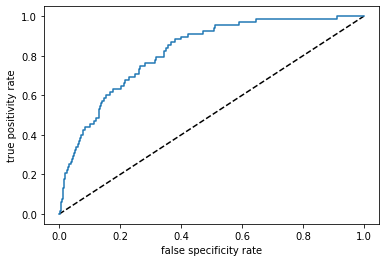

In [63]:
y_pred_prob=model2.predict(x_test_vif)
from sklearn.metrics import roc_curve
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(tpr,fpr)
plt.xlabel('false specificity rate')
plt.ylabel('true positivity rate')
plt.show()

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted_df2['stroke']))

              precision    recall  f1-score   support

         0.0       0.75      0.00      0.00      1465
         1.0       0.04      0.99      0.08        68

    accuracy                           0.05      1533
   macro avg       0.40      0.49      0.04      1533
weighted avg       0.72      0.05      0.01      1533



Decision Tree Classifier

In [65]:
from sklearn.tree import DecisionTreeClassifier
clf_DT = DecisionTreeClassifier(criterion='gini', random_state=0)

In [66]:
model_dt=clf_DT.fit(x_train,y_train)

In [67]:
predict_dt=model_dt.predict(x_test)

In [68]:
model_dt.predict_proba(x_test)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

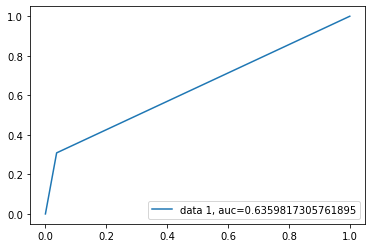

In [69]:
y_pred_proba = model_dt.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [99]:
cols = ['Model','ROC Score', 'Precision Score', 'Recall Score','Accuracy Score',
        'Kappa Score']
models_report = pd.DataFrame(columns = cols)


In [100]:
tmp3=pd.Series({'Model':'DecisionTree considering gini criterion',
                'ROC Score':metrics.roc_auc_score(y_test,predict_dt),
                 'Precision Score':metrics.precision_score(y_test,predict_dt),
                'Recall Score':metrics.recall_score(y_test,predict_dt),
                 'Accuracy score':metrics.accuracy_score(y_test,predict_dt),
                'Kappa Score':metrics.cohen_kappa_score(y_test,predict_dt)})
model_report3=models_report.append(tmp3,ignore_index=True)

In [101]:
model_report3

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,Accuracy score
0,DecisionTree considering gini criterion,0.635982,0.28,0.308824,NaN,0.25924,0.934116


In [87]:
from sklearn.ensemble import RandomForestClassifier
# Create random tree classifer object
clf_RF = RandomForestClassifier(random_state=0, n_jobs=-1)

In [88]:
model_RF = clf_RF.fit(x_train,y_train)

# Predicting the model
y_pred_RF = model_RF.predict(x_test)

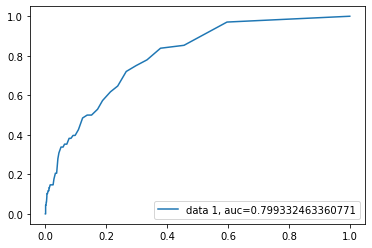

In [89]:
y_pred_proba = model_RF.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


In [90]:
tmp4 = pd.Series({'Model': " Random Forest Classifier ",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_pred_RF),
                 'Precision Score': metrics.precision_score(y_test, y_pred_RF),
                 'Recall Score': metrics.recall_score(y_test, y_pred_RF),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_RF),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred_RF)})

model_rf1_report = models_report.append(tmp4, ignore_index = True)
model_rf1_report

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,Random Forest Classifier,0.507012,0.5,0.014706,0.955643,0.026103
